### lab-3 knn

Мисюрина Ирина

In [1]:
!wget https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv
!wget https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/water_potability.csv

--2024-03-24 16:52:48--  https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2772143 (2.6M) [text/plain]
Saving to: ‘diamonds.csv’

diamonds.csv        100%[===================>]   2.64M  --.-KB/s    in 0.02s   

2024-03-24 16:52:48 (158 MB/s) - ‘diamonds.csv’ saved [2772143/2772143]

--2024-03-24 16:52:48--  https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/water_potability.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5

In [2]:
import pandas as pd


1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [3]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



2. Бинарная классификация:
   - Привести описание датасета.

Так как в датасете алмазов нет бинарного признака, для бинарной классификации возьмем другой датасет (качество воды)

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|ph|ph - float|б/м|
|hardness|жесткость - float|б/м|
|solids|твердые вещества - float|мг/л|
|chloramines|хлорамины - float|мг/л|
|sulfate|сульфаты - float|мг/л|
|conductivity|проводимость - float|мкС/см|
|organic carbon|органический углерод - float|мг/л|
|trihalomethanes|тригалометаны - float|мг/л|
|turbidity|мутность - float|NTU|
|potability|пригодность для питья|0 - непригодна, 1 - пригодна|

Будем определять potability по остальным признакам

   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.fillna(df.mean(), inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
for col in df.columns:
    print(f'{col}: {len(df[col].unique())} unique objects')

ph: 2786 unique objects
Hardness: 3276 unique objects
Solids: 3276 unique objects
Chloramines: 3276 unique objects
Sulfate: 2496 unique objects
Conductivity: 3276 unique objects
Organic_carbon: 3276 unique objects
Trihalomethanes: 3115 unique objects
Turbidity: 3276 unique objects
Potability: 2 unique objects


   - Закодировать категориальные признаки при необходимости.

Таковых нет

   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.

In [8]:
k = 5

   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для всех последующих манипуляций.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(2293,) (983,)


   - Осуществить бинарную классификацию.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
baseline_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [13]:
baseline_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [14]:
preds = baseline_model.predict(X_test)

   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [16]:
print(f'Accuracy:\t{accuracy_score(y_test, preds)}')
print(f'Precision:\t{precision_score(y_test, preds)}')
print(f'Recall:\t{recall_score(y_test, preds)}')
print(f'F1-measure:\t{f1_score(y_test, preds)}')
print(classification_report(y_test, preds))

Accuracy:	0.5483214649033571
Precision:	0.3717105263157895
Recall:	0.3087431693989071
F1-measure:	0.3373134328358209
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       617
           1       0.37      0.31      0.34       366

    accuracy                           0.55       983
   macro avg       0.50      0.50      0.50       983
weighted avg       0.53      0.55      0.54       983



   - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
all_cols = list(X_train.columns)
scaler = MinMaxScaler()
scaler.fit(X[all_cols])
scaled = scaler.transform(X_train[all_cols])
data_scaled = pd.DataFrame(scaled, columns=all_cols)
data_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.505771,0.511489,0.467451,0.601828,0.718714,0.420997,0.320908,0.507029,0.336241
1,0.514531,0.438944,0.369511,0.464286,0.405908,0.447465,0.544470,0.517336,0.933855
2,0.505771,0.708746,0.475766,0.430672,0.600370,0.492484,0.123626,0.532673,0.391867
3,0.432630,0.596078,0.067634,0.716658,0.581699,0.236838,0.596414,0.428382,0.360760
4,0.684371,0.637901,0.459261,0.415924,0.581699,0.379456,0.350604,0.355634,0.468742


   - Осуществить бинарную классификацию.

In [19]:
scaled_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [20]:
scaled_model.fit(data_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [21]:
preds_scaled = scaled_model.predict(scaler.transform(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [22]:
print(f'Accuracy:\t{accuracy_score(y_test, preds_scaled)}')
print(f'Precision:\t{precision_score(y_test, preds_scaled)}')
print(f'Recall:\t{recall_score(y_test, preds_scaled)}')
print(f'F1-measure:\t{f1_score(y_test, preds_scaled)}')
print(classification_report(y_test, preds_scaled))

Accuracy:	0.6266531027466938
Precision:	0.4982078853046595
Recall:	0.3797814207650273
F1-measure:	0.43100775193798446
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       617
           1       0.50      0.38      0.43       366

    accuracy                           0.63       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.63      0.61       983



   - Сравнить метрики на данных без нормализации и с применением нормализации.

Метрики стали поприятнее, чем до нормализации, но все еще не очень удовлетворительные

  Далее используем нормализованные данные.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.

In [23]:
import seaborn as sns

<Axes: >

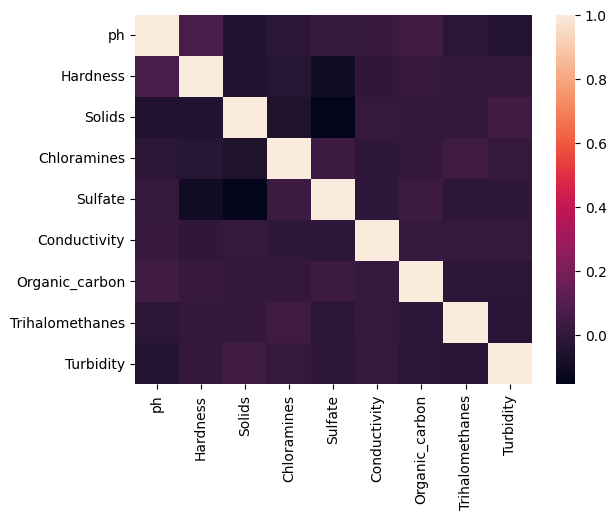

In [24]:
sns.heatmap(data_scaled.corr())

In [25]:
import numpy as np
matrix = data_scaled.corr()
np.fill_diagonal(matrix.values, 0)
threshold = 0.05
filtered_corr = matrix.abs() > threshold
feature_importance = filtered_corr.sum(axis=1)
sorted_features = feature_importance.sort_values(ascending=False)
filter_threshold = 0
selected_features = sorted_features[sorted_features > filter_threshold].index
print(selected_features)

Index(['Solids', 'Hardness', 'ph', 'Sulfate', 'Chloramines'], dtype='object')


   - Осуществить бинарную классификацию с отфильтрованными признаками.

In [26]:
filter_model = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')

In [27]:
filter_model.fit(data_scaled[selected_features], y_train)

KNeighborsClassifier(metric='euclidean')

In [28]:
filter_preds = filter_model.predict(pd.DataFrame(scaler.transform(X_test), columns=all_cols)[selected_features])

   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [29]:
print(f'Accuracy:\t{accuracy_score(y_test, filter_preds)}')
print(f'Precision:\t{precision_score(y_test, filter_preds)}')
print(f'Recall:\t{recall_score(y_test, filter_preds)}')
print(f'F1-measure:\t{f1_score(y_test, filter_preds)}')
print(classification_report(y_test, filter_preds))

Accuracy:	0.6785350966429298
Precision:	0.5838926174496645
Recall:	0.47540983606557374
F1-measure:	0.5240963855421688
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       617
           1       0.58      0.48      0.52       366

    accuracy                           0.68       983
   macro avg       0.65      0.64      0.64       983
weighted avg       0.67      0.68      0.67       983



   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.

Метрики стали еще лучше, т.к. убрались лишние признаки

   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
     > данных - исходных данных до разбиения с применением нормализации
   
     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
X_scaled = pd.DataFrame(scaler.transform(X), columns=all_cols)[selected_features]
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=all_cols)[selected_features]
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=all_cols)[selected_features]

train_score = []
test_score = []
crossval_score = []

for k in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_scaled, y, cv = 10)
    print(f"Neighbors: {k}, folds count: 10 avg score: {scores.mean()}")
    crossval_score.append(scores.mean())
    model.fit(X_train_scaled, y_train)
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    train_score.append(accuracy_score(y_train, pred_train))
    test_score.append(accuracy_score(y_test, pred_test))



Neighbors: 1, folds count: 10 avg score: 0.5732723577235773
Neighbors: 2, folds count: 10 avg score: 0.6172148877452077
Neighbors: 3, folds count: 10 avg score: 0.5961466025210711
Neighbors: 4, folds count: 10 avg score: 0.6217880584769151
Neighbors: 5, folds count: 10 avg score: 0.6098754382039233
Neighbors: 6, folds count: 10 avg score: 0.6239259342134705
Neighbors: 7, folds count: 10 avg score: 0.6211801670769
Neighbors: 8, folds count: 10 avg score: 0.6315628030133513
Neighbors: 9, folds count: 10 avg score: 0.6321706944133662
Neighbors: 10, folds count: 10 avg score: 0.6355290146938166
Neighbors: 11, folds count: 10 avg score: 0.6279014693816662
Neighbors: 12, folds count: 10 avg score: 0.6315656000596703
Neighbors: 13, folds count: 10 avg score: 0.6346209069888864
Neighbors: 14, folds count: 10 avg score: 0.6468197583351981
Neighbors: 15, folds count: 10 avg score: 0.6410233460132766


In [32]:
from matplotlib import pyplot as plt

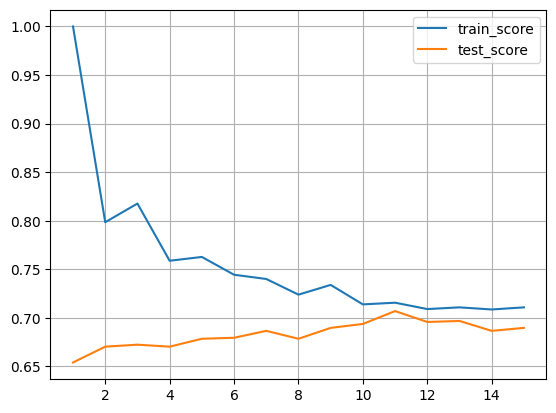

In [33]:
plt.plot(range(1, 16), train_score, label="train_score")
plt.plot(range(1, 16), test_score, label="test_score")
plt.legend()
plt.grid()

3. Многоклассовая классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных - "подчистить данные".

Берем датасет из прошлых лабораторных

In [34]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|carat|масса|карат|
|cut|огранка|категория (средняя, хорошая, очень хорошая, премиум, идеальная)
|color|цвет|категория|
|clarity|прозрачность|категория|
|depth|высота|мм|
|table|ширина|мм|
|price|цена|у.е. (скорее всего доллары)|
|x|геометрия по оси x|мм|
|y|геометрия по оси y|мм|
|z|геометрия по оси z|мм|

- Закодировать категориальные признаки при необходимости.

Будем предсказывать Cut  
Так как везде не так много вариантов категорий, то будем использовать One-Hot Encoder (кроме целевого признака - там Label)

In [35]:
cols = ['color', 'clarity']
df = pd.get_dummies(data=df, columns=cols, drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_D       53940 non-null  uint8  
 9   color_E       53940 non-null  uint8  
 10  color_F       53940 non-null  uint8  
 11  color_G       53940 non-null  uint8  
 12  color_H       53940 non-null  uint8  
 13  color_I       53940 non-null  uint8  
 14  color_J       53940 non-null  uint8  
 15  clarity_I1    53940 non-null  uint8  
 16  clarity_IF    53940 non-null  uint8  
 17  clarity_SI1   53940 non-null  uint8  
 18  clarity_SI2   53940 non-nu

In [36]:
keys, values = pd.factorize(df['cut'].unique())
d = dict(zip(values, keys))

In [37]:
df['cut'] = df['cut'].replace(d)

In [38]:
df.head()

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,0,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,1,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,1,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0


- Нормализовать данные.

In [39]:
scaler = MinMaxScaler()
X = df.drop('cut', axis=1)
y = df['cut']
all_cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns=all_cols)

- Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.

In [40]:
k = 3

   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для данных без фильтрации признаков и с применением фильтрации.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(37758,) (16182,)


   - Осуществить многоклассовую классификацию.

In [42]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
preds = model.predict(X_test)

   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [43]:
print(f'Accuracy:\t{accuracy_score(y_test, preds)}')
print(f'Precision (micro):\t{precision_score(y_test, preds, average="micro")}')
print(f'Recall (micro):\t{recall_score(y_test, preds, average="micro")}')
print(f'F1-measure (micro):\t{f1_score(y_test, preds, average="micro")}')
print(classification_report(y_test, preds))

Accuracy:	0.6266839698430354
Precision (micro):	0.6266839698430354
Recall (micro):	0.6266839698430354
F1-measure (micro):	0.6266839698430354
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      6487
           1       0.60      0.64      0.61      4142
           2       0.53      0.36      0.43      1500
           3       0.38      0.27      0.32      3566
           4       0.88      0.46      0.61       487

    accuracy                           0.63     16182
   macro avg       0.62      0.52      0.55     16182
weighted avg       0.60      0.63      0.61     16182



   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений

<Axes: >

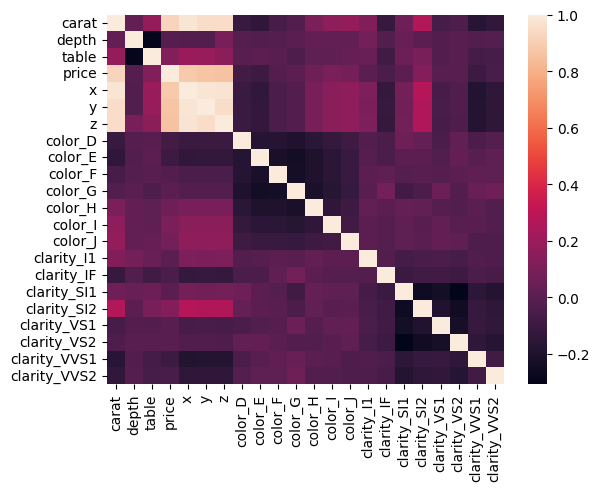

In [44]:
sns.heatmap(X.corr())

In [45]:
matrix = X.corr()
np.fill_diagonal(matrix.values, 0)
threshold = 0.25
filtered_corr = matrix.abs() > threshold
feature_importance = filtered_corr.sum(axis=1)
sorted_features = feature_importance.sort_values(ascending=False)
filter_threshold = 0
selected_features = sorted_features[sorted_features > filter_threshold].index
print(selected_features)

Index(['carat', 'x', 'y', 'z', 'clarity_SI2', 'price', 'clarity_SI1', 'table',
       'clarity_VS2', 'depth'],
      dtype='object')


   - Осуществить многоклассовую классификацию с отфильтрованными признаками.

In [46]:
X_f = X[selected_features]
X_train_f = X_train[selected_features]
X_test_f = X_test[selected_features]

In [47]:
model_f = KNeighborsClassifier(n_neighbors=k)
model_f.fit(X_train_f, y_train)
preds_f = model_f.predict(X_test_f)

   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [48]:
print(f'Accuracy:\t{accuracy_score(y_test, preds_f)}')
print(f'Precision (micro):\t{precision_score(y_test, preds_f, average="micro")}')
print(f'Recall (micro):\t{recall_score(y_test, preds_f, average="micro")}')
print(f'F1-measure (micro):\t{f1_score(y_test, preds_f, average="micro")}')
print(classification_report(y_test, preds_f))

Accuracy:	0.6568409343715239
Precision (micro):	0.6568409343715239
Recall (micro):	0.6568409343715239
F1-measure (micro):	0.6568409343715239
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      6487
           1       0.62      0.65      0.64      4142
           2       0.62      0.50      0.55      1500
           3       0.42      0.32      0.36      3566
           4       0.87      0.69      0.77       487

    accuracy                           0.66     16182
   macro avg       0.66      0.61      0.63     16182
weighted avg       0.64      0.66      0.64     16182



   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.

Метрики стали немного лучше

   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
      > данных - исходных данных до разбиения

     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

In [49]:
train_score = []
test_score = []
crossval_score = []

for k in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_f, y, cv = 3)
    print(f"Neighbors: {k}, folds count: 3 avg score: {scores.mean()}")
    crossval_score.append(scores.mean())
    model.fit(X_train_f, y_train)
    pred_train = model.predict(X_train_f)
    pred_test = model.predict(X_test_f)
    train_score.append(accuracy_score(y_train, pred_train))
    test_score.append(accuracy_score(y_test, pred_test))

Neighbors: 1, folds count: 3 avg score: 0.42486095661846496
Neighbors: 2, folds count: 3 avg score: 0.4522803114571747
Neighbors: 3, folds count: 3 avg score: 0.45381905821282914
Neighbors: 4, folds count: 3 avg score: 0.4690767519466073
Neighbors: 5, folds count: 3 avg score: 0.4697626992955135
Neighbors: 6, folds count: 3 avg score: 0.47415647015202084
Neighbors: 7, folds count: 3 avg score: 0.4757693733778272
Neighbors: 8, folds count: 3 avg score: 0.4772339636633296
Neighbors: 9, folds count: 3 avg score: 0.4784019280682239
Neighbors: 10, folds count: 3 avg score: 0.4806451612903226
Neighbors: 11, folds count: 3 avg score: 0.48025583982202447
Neighbors: 12, folds count: 3 avg score: 0.48185020393029293
Neighbors: 13, folds count: 3 avg score: 0.48201705598813493
Neighbors: 14, folds count: 3 avg score: 0.48396366332962554
Neighbors: 15, folds count: 3 avg score: 0.4830552465702633


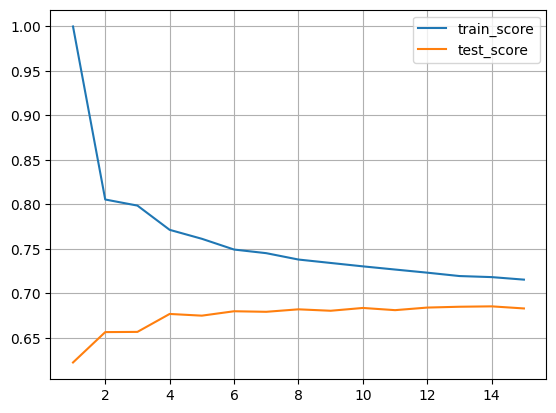

In [50]:
plt.plot(range(1, 16), train_score, label="train_score")
plt.plot(range(1, 16), test_score, label="test_score")
plt.legend()
plt.grid()

   - Для лучшего классификатора привести метрики, `classification_report`, построить `confusion matrix`.

Будем смотреть лучший результат по тестовой выборке (исключая тривиальный случай $k=1$)

In [51]:
best = test_score.index(max(test_score[1:]))
best

13

Т.е. лучший результат на тестовой выборке достигается при $k=14$

In [52]:
model_f = KNeighborsClassifier(n_neighbors=14)
model_f.fit(X_train_f, y_train)
preds_f = model_f.predict(X_test_f)

In [53]:
print(classification_report(y_test, preds_f))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      6487
           1       0.62      0.77      0.69      4142
           2       0.62      0.47      0.53      1500
           3       0.48      0.27      0.35      3566
           4       0.93      0.54      0.68       487

    accuracy                           0.69     16182
   macro avg       0.69      0.59      0.62     16182
weighted avg       0.66      0.69      0.66     16182



In [54]:
from sklearn.metrics import confusion_matrix

<Axes: >

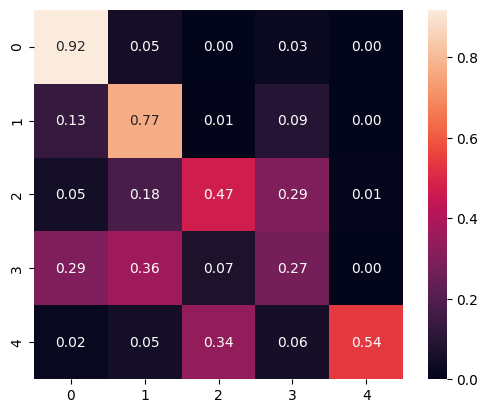

In [55]:
sns.heatmap(data=confusion_matrix(y_test, preds_f, normalize='true'), square=True, annot=True, fmt='.2f')